<h1 align="center">Analysis of Pulsar Star Dataset Using Machine Learning Techniques</h1>

In this project, I build a Support Vector Machines classifier to classify a Pulsar star. I have used the Predicting a Pulsar Star dataset for this project. I have downloaded this dataset from the Kaggle website.

#### Table of Contents

- The problem statement
- Dataset description
- Import tools
- Import dataset
- Exploratory data analysis
- Declare feature vector and target variable
- Split data into separate training and test set
- Feature scaling
- SVM with default hyperparameters
- SVM with linear kernel
- SVM with polynomial kernel
- SVM with sigmoid kernel
- Confusion matrix
- Classification metrices
- ROC - AUC
- Stratified k-fold Cross Validation with shuffle split
- Hyperparameter optimization using GridSearch CV
- Results and conclusion


#  The problem statement
In this project, I try to classify a pulsar star as legitimate or spurious pulsar star. The legitimate pulsar stars form a minority positive class and spurious pulsar stars form the majority negative class. I implement Support Vector Machines (SVMs) classification algorithm with Python and Scikit-Learn to solve this problem.

To answer the question, I build a SVM classifier to classify the `pulsar star` as legitimate or spurious. I have used the Predicting a <a href="https://www.kaggle.com/datasets/chandrashekhargt/pulsar-star">Pulsar_Star_Dataset</a>  downloaded from the Kaggle website for this project.

#  Dataset description

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Classification algorithms in particular are being adopted, which treat the data sets as binary classification problems. Here the legitimate pulsar examples form minority positive class and spurious examples form the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

**Attribute Information:** 

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

 - Mean of the integrated profile.

 - Standard deviation of the integrated profile.

 - Excess kurtosis of the integrated profile.

 - Skewness of the integrated profile.

 - Mean of the DM-SNR curve.

 - Standard deviation of the DM-SNR curve.

 - Excess kurtosis of the DM-SNR curve.

 - Skewness of the DM-SNR curve.

 - Class

#  Import tools

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
# Dataset
import os
os.getcwd()

'C:\\Users\\admin\\Desktop\\Machine Learning\\Support Vector Machine'

In [22]:
df=pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\Datasets\pulsar_star.csv")
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


#  Exploratory data analysis

In [23]:
df.shape

(17898, 9)

In [24]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [25]:
col_names=df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [26]:
df.columns=df.columns.str.replace("_"," ")

In [27]:
df.columns=df.columns.str.strip()

In [28]:
df.columns=df.columns.str.replace(" ","_")

In [29]:
df.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM-SNR_curve',
       'Standard_deviation_of_the_DM-SNR_curve',
       'Excess_kurtosis_of_the_DM-SNR_curve', 'Skewness_of_the_DM-SNR_curve',
       'target_class'],
      dtype='object')

In [30]:
df.columns = ['IP_Mean', 'IP_Sd', 'IP_Kurtosis', 'IP_Skewness', 
              'DM_SNR_Mean', 'DM_SNR_Sd', 'DM_SNR_Kurtosis', 'DM_SNR_Skewness', 'target_class']

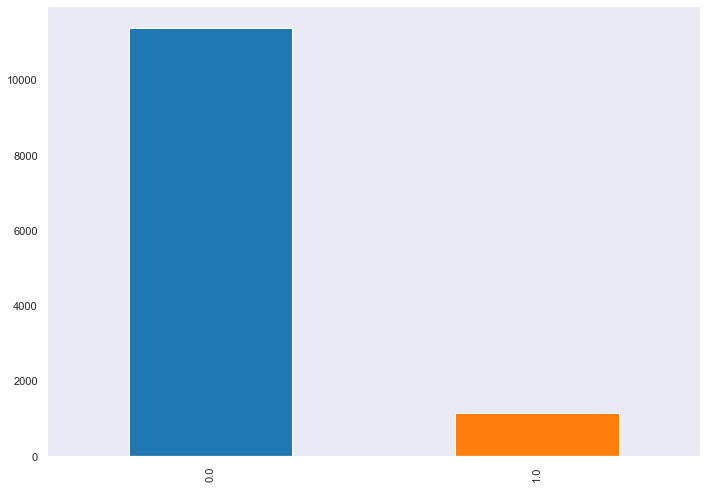

In [32]:
df.target_class.value_counts().plot(kind="bar",color=sns.color_palette(palette="tab10"))
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("dark")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP_Mean          17898 non-null  float64
 1   IP_Sd            17898 non-null  float64
 2   IP_Kurtosis      15396 non-null  float64
 3   IP_Skewness      17898 non-null  float64
 4   DM_SNR_Mean      17898 non-null  float64
 5   DM_SNR_Sd        16196 non-null  float64
 6   DM_SNR_Kurtosis  17898 non-null  float64
 7   DM_SNR_Skewness  17029 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


# Handling Null Obsevations Using Statistical Tools

In [34]:
df.isnull().sum()

IP_Mean               0
IP_Sd                 0
IP_Kurtosis        2502
IP_Skewness           0
DM_SNR_Mean           0
DM_SNR_Sd          1702
DM_SNR_Kurtosis       0
DM_SNR_Skewness     869
target_class       5370
dtype: int64

In [36]:
df.IP_Kurtosis.fillna(df.IP_Kurtosis.median(),inplace=True)

In [37]:
df.DM_SNR_Sd.fillna(df.DM_SNR_Sd.median(),inplace=True)

In [38]:
df.DM_SNR_Skewness.fillna(df.DM_SNR_Skewness.median(),inplace=True)

In [39]:
df.target_class.fillna(statistics.mode(df.target_class),inplace=True)

In [40]:
import statistics

In [41]:
df.isnull().sum()

IP_Mean            0
IP_Sd              0
IP_Kurtosis        0
IP_Skewness        0
DM_SNR_Mean        0
DM_SNR_Sd          0
DM_SNR_Kurtosis    0
DM_SNR_Skewness    0
target_class       0
dtype: int64

In [42]:
cols=df.select_dtypes(include=np.number).columns.tolist()

**Summary of numerical variables:**
    
There are 9 numerical variables in the dataset.

 - 8 are continuous variables and 1 is discrete variable.

 - The discrete variable is target_class variable. It is also the target variable.

 - There are no missing values in the dataset.

# Outliers Detection

In [43]:
plt.figure(figsize=(24,20))


<Figure size 1728x1440 with 0 Axes>

<Figure size 1728x1440 with 0 Axes>

In [44]:
columns=[i for i in cols if "target_class" not in i]

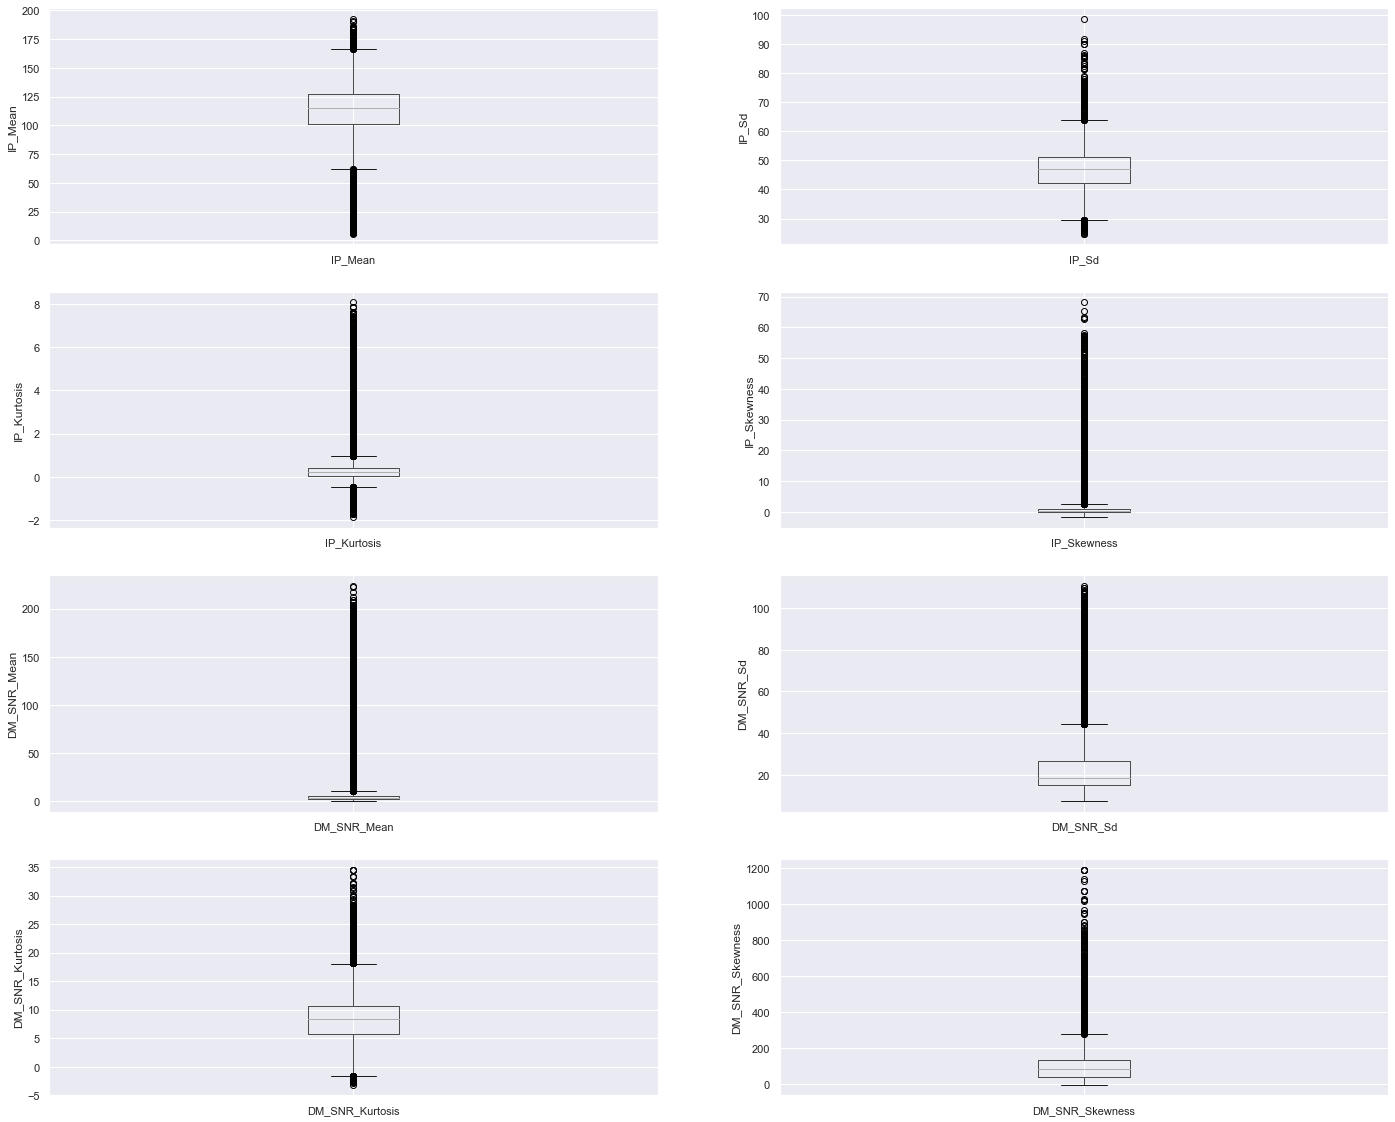

In [46]:
plt.figure(figsize=(24,20))
for i,var in enumerate(columns):
    plt.subplot(4,2,1+i)
    fig=df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    sns.set_style("dark")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

**Handle outliers with SVMs**

There are 2 variants of SVMs. They are `hard-margin variant of SVM` and `soft-margin variant of SVM`.

The hard-margin variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.

Another version of SVM is called soft-margin variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of `C` parameter, which controls the outliers. `Low C` implies we are allowing more outliers and `high C` implies less outliers.

The message is that since the dataset contains outliers, so the value of C should be high while training the model.

# Check the distribution of variables

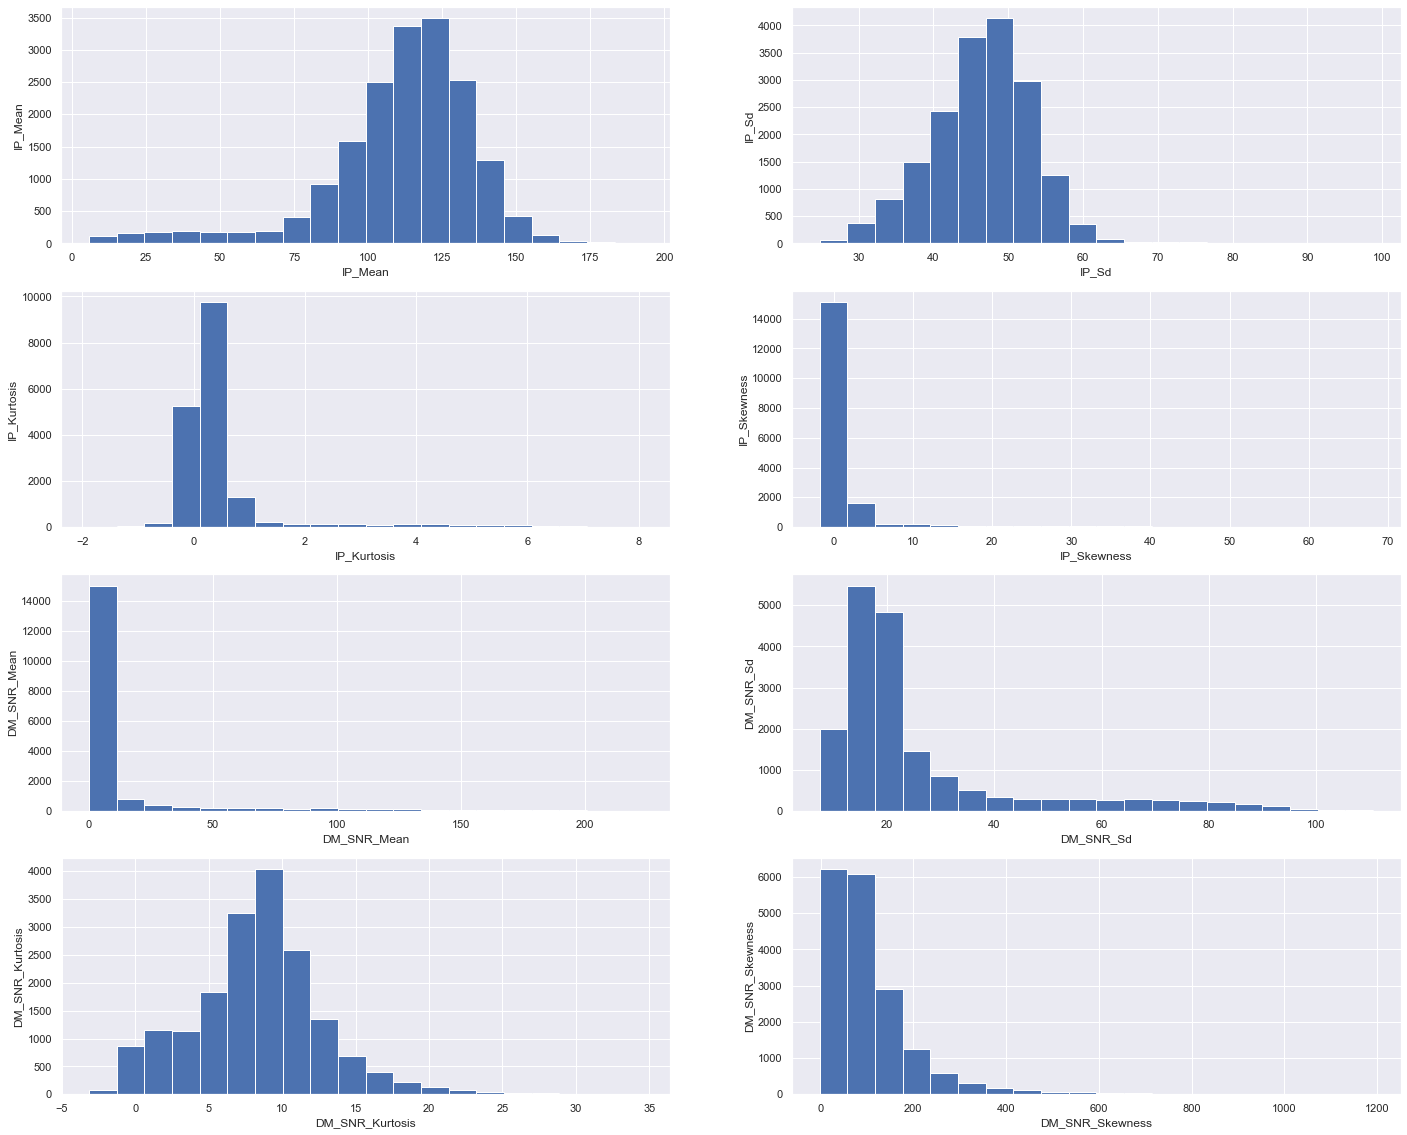

In [47]:
plt.figure(figsize=(24,20))
for i,var in enumerate(columns):
    plt.subplot(4,2,1+i)
    fig=df[var].hist(bins=20)
    fig.set_title('')
    fig.set_ylabel(var)
    fig.set_xlabel(var)
    sns.set_style("dark")

# Declare feature vector and target variable

In [48]:
X=df.drop(columns=["target_class"],axis=1)
y=df["target_class"]

#  Split data into separate training and test set

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
X_train.shape,X_test.shape

((14318, 8), (3580, 8))

# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols_train=X_train.columns.to_list()
cols_test=X_test.columns.to_list()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=cols_train)
X_test=pd.DataFrame(scaler.transform(X_test),columns=cols_test)

In [52]:
X_train.describe()

,IP_Mean,IP_Sd,IP_Kurtosis,IP_Skewness,DM_SNR_Mean,DM_SNR_Sd,DM_SNR_Kurtosis,DM_SNR_Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,2.334896e-16,-4.436550e-16,4.118944e-17,-3.970067e-17,-3.548247e-17,4.168570e-17,-1.875857e-16,7.741631e-17
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.098053e+00,-3.172536e+00,-2.345425e+00,-5.753239e-01,-4.194711e-01,-9.724083e-01,-2.542009e+00,-1.012449e+00
25%,-3.998079e-01,-6.147909e-01,-3.876861e-01,-3.182492e-01,-3.612044e-01,-5.764547e-01,-5.566807e-01,-6.303592e-01
50%,1.559973e-01,5.839602e-02,-2.197909e-01,-2.551748e-01,-3.312998e-01,-3.791844e-01,2.889867e-02,-2.049900e-01
75%,6.235154e-01,6.469725e-01,-1.871783e-02,-1.346574e-01,-2.420931e-01,4.606233e-02,5.279422e-01,2.966395e-01
max,3.175094e+00,7.608885e+00,7.719476e+00,1.081183e+01,7.204393e+00,4.553481e+00,5.810629e+00,1.035435e+01


#  SVM with default hyperparameters

Default hyperparameter means C=`1.0`, kernel=`rbf` and gamma=`auto` among other parameters.

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [54]:
svc=SVC()
svc.fit(X_train,y_train)
y_hat=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_hat)))

Model accuracy score with default hyperparameters: 0.9598


# SVM with rbf kernel and C=100.0

We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [53]:
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_hat=svc.predict(X_test)
print('Model accuracy score with kernal rbf and C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_hat)))

Model accuracy score with kernal rbf and C=100.0: 0.9573


# SVM with rbf kernel and C=1000.0

In [54]:
svc=SVC(C=1000.0)
svc.fit(X_train,y_train)
y_hat=svc.predict(X_test)
print('Model accuracy score with kernal rbf and C=1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_hat)))

Model accuracy score with kernal rbf and C=1000.0: 0.9536


#  SVM with linear kernel

In [55]:
C=[1.0,100.0]
for i in C:
    svc=SVC(kernel="linear",C=i)
    svc.fit(X_train,y_train)
    y_hat=svc.predict(X_test)
    print(f'Model accuracy score with linear kernal and C={i}: {accuracy_score(y_test, y_hat)}')

Model accuracy score with linear kernal and C=1.0: 0.9536312849162011
Model accuracy score with linear kernal and C=100.0: 0.9536312849162011


# Checking overfitting and underfitting

In [56]:
C=[1.0,100.0]
for i in C:
    svc=SVC(kernel="linear",C=i)
    svc.fit(X_train,y_train)
    y_hat=svc.predict(X_test)
    print(f'Model score with linear kernal and C={i} on training data : {svc.score(X_train, y_train)}')
    print(f'Model score with linear kernal and C={i} on testing data : {svc.score(X_test, y_test)}')

Model score with linear kernal and C=1.0 on training data : 0.9566280206732783
Model score with linear kernal and C=1.0 on testing data : 0.9536312849162011
Model score with linear kernal and C=100.0 on training data : 0.9566280206732783
Model score with linear kernal and C=100.0 on testing data : 0.9536312849162011


In [57]:
y_test.value_counts()

0.0    3345
1.0     235
Name: target_class, dtype: int64

In [58]:
null_acuracy=3345/(3345+235)
null_acuracy

0.9343575418994413

# SVM with polynomial kernel

In [59]:
C=[1.0,100.0]
for i in C:
    svc=SVC(kernel="poly",C=i)
    svc.fit(X_train,y_train)
    y_hat=svc.predict(X_test)
    print(f'Model accuracy score with poly kernal and C={i}: {accuracy_score(y_test, y_hat)}')
    print()

Model accuracy score with poly kernal and C=1.0: 0.9541899441340782

Model accuracy score with poly kernal and C=100.0: 0.9561452513966481



# SVM with sigmoid kernel

In [60]:
C=[1.0,100.0]
for i in C:
    svc=SVC(kernel="sigmoid",C=i)
    svc.fit(X_train,y_train)
    y_hat=svc.predict(X_test)
    print(f'Model accuracy score with sigmoid kernal and C={i}: {accuracy_score(y_test, y_hat)}')
    print()

Model accuracy score with sigmoid kernal and C=1.0: 0.9460893854748603

Model accuracy score with sigmoid kernal and C=100.0: 0.9441340782122905



**Comments**

We get maximum accuracy with `rbf` and `linear kernel` with `C=100.0`. and the accuracy is `0.9832`. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.

So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making.

One such metric to analyze the model performance in imbalanced classes problem is `Confusion matrix`.

#  Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_hat,y_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3266   65]
 [  79  170]]

True Positives(TP) =  3266

True Negatives(TN) =  170

False Positives(FP) =  65

False Negatives(FN) =  79


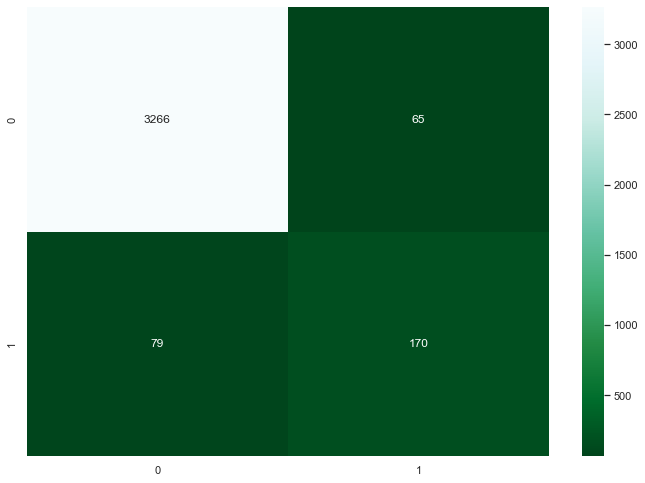

In [59]:
cm=pd.DataFrame(cm)
sns.heatmap(cm,annot=True,cmap='BuGn_r',fmt="d")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.show()

#  Classification metrices

**Classification report** is another way to evaluate the classification model performance. It displays the **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

In [71]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3345
         1.0       0.58      0.53      0.56       235

    accuracy                           0.94      3580
   macro avg       0.77      0.75      0.76      3580
weighted avg       0.94      0.94      0.94      3580



**Precision**

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, `Precision` identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.

**Recall**

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called *Sensitivity*.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be defined as the ratio of `TP to (TP + FN)`.

**f1-score**

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

#  ROC - AUC

Another tool to measure the classification model performance visually is `ROC Curve`. ROC Curve stands for **Receiver Operating Characteristic Curve**. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the `True Positive Rate (TPR)` against the `False Positive Rate (FPR)` at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of `TP to (TP + FN)`.

False Positive Rate (FPR) is defined as the ratio of `FP to (FP + TN)`.

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

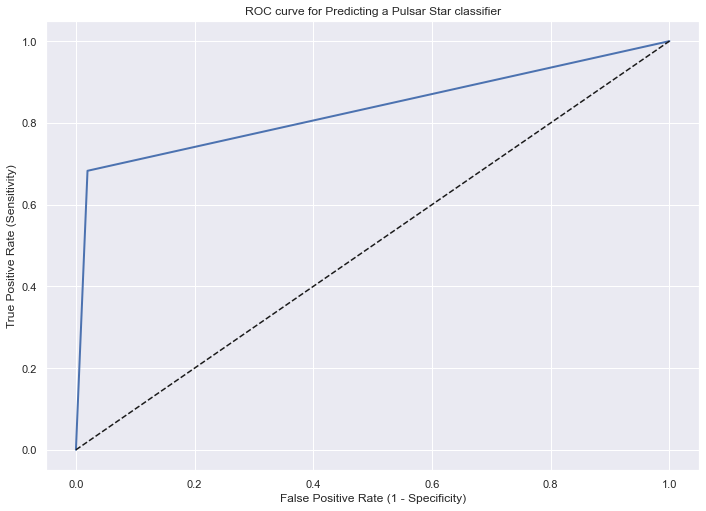

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_hat,y_test)

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

plt.show()

#### ROC AUC

ROC AUC stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [74]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_hat,y_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7744


#  Stratified k-fold Cross Validation with shuffle split

k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, I will use another technique to evaluate model performance. It is called stratified k-fold cross-validation.

In stratified k-fold cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

Moreover, I will shuffle the data before splitting because shuffling yields much better result.

**Stratified k-Fold Cross Validation with shuffle split with linear kernel**

In [ ]:
from sklearn.model_selection import cross_val_score
kernal=["linear","poly","sigmoid"]
for i in kernal:
    cross_score=cross_val_score(SVC(kernel=i,C=100),X_train,y_train,cv=10,scoring="roc_auc").mean()
    print(f"The cross validation roc_score with kernal {i} is {cross_score}")
    print()

The cross validation roc_score with kernal linear is 0.95516489756188



# Hyperparameter Optimization using GridSearch CV

In [33]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
dt=DecisionTreeClassifier(max_depth=8)
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)
accuracy_score(y_hat,y_test)


0.9575418994413408

In [35]:
GD=GradientBoostingClassifier(max_depth=8)
GD.fit(X_train,y_train)
y_gb=GD.predict(X_test)
accuracy_score(y_gb,y_test)

0.9564245810055866

In [36]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=10,bootstrap=True,oob_score=True,n_jobs=-1)

In [37]:
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)
accuracy_score(y_rf,y_test)

0.9597765363128492